This notebook is to visualize the data in a preliminary way and to get familiar with the data we are working with.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# !pip install datasette csvs-to-sqlite
# import threading
# import subprocess
# import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path_reactions = '/content/drive/My Drive/Data_MedEffect/reactions.txt'
path_report_drug_indication = '/content/drive/My Drive/Data_MedEffect/report_drug_indication.txt'
path_reports = '/content/drive/My Drive/Data_MedEffect/reports.txt'
path_report_drug = '/content/drive/My Drive/Data_MedEffect/report_drug.txt'

In [ ]:
# function to parse through txt file
def strip_quotes(x):
    return x.strip('"') if isinstance(x, str) else x

dtype_map = {3: str, 4: str}
df_reactions = pd.read_csv(path_reactions, delimiter = "$", header=None, dtype=dtype_map)
df_reactions.columns = ["REACTION_ID", "REPORT_ID", "DURATION", "DURATION_UNIT_ENG", "DURATION_UNIT_FR", "PT_NAME_ENG", "PT_NAME_FR", "SOC_NAME_ENG", "SOC_NAME_FR", "MEDDRA_VERSION"]
df_reactions = df_reactions.applymap(strip_quotes)
df_reactions.drop(columns=["DURATION_UNIT_FR", "PT_NAME_FR", "SOC_NAME_FR", "MEDDRA_VERSION", "REACTION_ID", "DURATION", "DURATION_UNIT_ENG"], inplace=True)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
print(df_reactions)



         REPORT_ID         PT_NAME_ENG                                       SOC_NAME_ENG
0                1            Pruritus             Skin and subcutaneous tissue disorders
1                1              Oedema  General disorders and administration site cond...
2                2           Urticaria             Skin and subcutaneous tissue disorders
3                3            Erythema             Skin and subcutaneous tissue disorders
4                3  Periorbital oedema                                      Eye disorders
...            ...                 ...                                                ...
4179584  906931316            Vomiting                         Gastrointestinal disorders
4179585  906931316    Weight decreased                                     Investigations
4179586  906931316    Weight increased                                     Investigations
4179587  906931316                Acne             Skin and subcutaneous tissue disorders
4179588  9

In [ ]:
df_drugs= pd.read_csv(path_report_drug_indication, delimiter = "$", header=None)
df_drugs.columns = ["REPORT_DRUG_ID", "REPORT_ID", "DRUG_PRODUCT_ID", "DRUGNAME", "INDICATION_NAME_ENG", "INDICATION_NAME_FR"]
df_drugs = df_drugs.applymap(strip_quotes)
df_drugs.drop(columns=["INDICATION_NAME_FR", "REPORT_DRUG_ID"], inplace=True)
print(df_drugs)
pd.set_option('display.max_seq_items', None)  # No limit on the number of displayed items in a sequence
pd.set_option('display.max_rows', None)       # Display all rows
pd.set_option('display.max_columns', None)
print(len(df_drugs["INDICATION_NAME_ENG"].unique()))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



6704


In [ ]:
# df_report_drug = pd.read_csv(path_report_drug, delimiter = "$", header=None)
# df_report_drug.columns = ["REPORT_DRUG_ID", "REPORT_ID", "DRUG_PRODUCT_ID", "DRUGNAME", "DRUGINVOLV_ENG", "DRUGINVOLV_FR", "ROUTEADMIN_ENG",
#                           "ROUTEADMIN_FR", "UNIT_DOSE_QTY", "DOSE_UNIT_ENG", "DOSE_UNIT_FR","FREQUENCY", "FREQ_TIME", "FREQUENCY_TIME_ENG", "FREQUENCY_TIME_FR","FREQ_TIME_UNIT_ENG",
#                           "FREQ_TIME_UNIT_FR", "THERAPY_DURATION", "THERAPY_DURATION_UNIT_ENG", "THERAPY_DURATION_UNIT_FR", "DOSAGEFORM_ENG", "DOSAGEFORM_FR"]
# df_report_drug = df_report_drug.applymap(strip_quotes)
# df_report_drug.drop(columns=["DRUGINVOLV_FR", "ROUTEADMIN_FR", "DOSE_UNIT_FR", "FREQUENCY_TIME_FR","FREQ_TIME_UNIT_FR", "THERAPY_DURATION_UNIT_FR",
#                              "DOSAGEFORM_FR", "FREQ_TIME", "FREQUENCY_TIME_ENG", "FREQ_TIME_UNIT_ENG","THERAPY_DURATION", "THERAPY_DURATION_UNIT_ENG",
#                              "DOSAGEFORM_ENG", "REPORT_DRUG_ID", "ROUTEADMIN_ENG", "UNIT_DOSE_QTY", "DOSE_UNIT_ENG","FREQUENCY", "DRUGINVOLV_ENG"], inplace=True)
# print(df_report_drug)

In [ ]:
dtype_map = {1: str, 5: str,16: str,39: str,40: str,41: str}
df_reports = pd.read_csv(path_reports, delimiter = "$", header=None, dtype=dtype_map)
df_reports.columns = [
    "REPORT_ID", "REPORT_NO", "VERSION_NO", "DATRECEIVED", "DATINTRECEIVED", "MAH_NO",
    "REPORT_TYPE_CODE", "REPORT_TYPE_ENG", "REPORT_TYPE_FR", "GENDER_CODE", "GENDER_ENG",
    "GENDER_FR", "AGE", "AGE_Y", "AGE_UNIT_ENG", "AGE_UNIT_FR", "OUTCOME_CODE",
    "OUTCOME_ENG", "OUTCOME_FR", "WEIGHT", "WEIGHT_UNIT_ENG", "WEIGHT_UNIT_FR", "HEIGHT",
    "HEIGHT_UNIT_ENG", "HEIGHT_UNIT_FR", "SERIOUSNESS_CODE", "SERIOUSNESS_ENG", "SERIOUSNESS_FR",  "DEATH",
    "DISABILITY", "CONGENITAL_ANOMALY", "LIFE_THREATENING", "HOSP_REQUIRED",
    "OTHER_MEDICALLY_IMP_COND", "REPORTER_TYPE_ENG", "REPORTER_TYPE_FR",
    "SOURCE_CODE", "SOURCE_ENG","SOURCE_FR", "E2B_IMP_SAFETYREPORT_ID",
    "AUTHORITY_NUMB", "COMPANY_NUMB"]
df_reports = df_reports.applymap(strip_quotes)

def convert_age(row):
    if row["AGE_UNIT_ENG"] == "Years":
        return row["AGE"]
    elif row["AGE_UNIT_ENG"] == "Months":
        return row["AGE"] / 12
    elif row["AGE_UNIT_ENG"] == "Weeks":
        return row["AGE"] / 52
    elif row["AGE_UNIT_ENG"] == "Days":
        return row["AGE"] / 365
    elif row["AGE_UNIT_ENG"] == "Hours":
        return row["AGE"] / 8760
    elif row["AGE_UNIT_ENG"] == "Decade":
        return row["AGE"]*10
    else:
        return row["AGE"]

def convert_height(row):
    if row["HEIGHT_UNIT_ENG"] == "Centimeter":
        return row["HEIGHT"] / 100
    if row["HEIGHT_UNIT_ENG"] == "Inch":
        return row["HEIGHT"] * 0.0254
    else:
        return row["HEIGHT"]

# Function to convert weight to kilograms
def convert_weight(row):
    if row["WEIGHT_UNIT_ENG"] == "Pound":
        return row["WEIGHT"] * 0.453592
    else:
        return row["WEIGHT"]

df_reports["AGE"] = df_reports.apply(lambda row: convert_age(row), axis=1)
df_reports["HEIGHT_M"] = df_reports.apply(lambda row: convert_height(row), axis=1)
df_reports["WEIGHT_KG"] = df_reports.apply(lambda row: convert_weight(row), axis=1)


df_reports.drop(columns=["VERSION_NO", "DATINTRECEIVED", "MAH_NO",
    "REPORT_TYPE_FR", "GENDER_FR", "AGE_Y", "AGE_UNIT_FR", "OUTCOME_CODE",
    "OUTCOME_FR", "WEIGHT_UNIT_FR", "HEIGHT_UNIT_FR", "SERIOUSNESS_FR", "REPORTER_TYPE_FR",
    "SOURCE_CODE", "SOURCE_FR", "E2B_IMP_SAFETYREPORT_ID", "AUTHORITY_NUMB", "COMPANY_NUMB", "REPORTER_TYPE_ENG",
    "SOURCE_ENG", "REPORT_TYPE_CODE", "REPORT_NO", "GENDER_CODE", "OUTCOME_ENG", "SERIOUSNESS_CODE", "DISABILITY",
    "REPORT_TYPE_ENG", "AGE_UNIT_ENG", "HEIGHT_UNIT_ENG", "WEIGHT_UNIT_ENG", "CONGENITAL_ANOMALY", "HOSP_REQUIRED"], inplace=True)

print(df_reports)
count_females = df_reports["GENDER_ENG"].value_counts().get('Female', 0)
count_males = df_reports["GENDER_ENG"].value_counts().get('Male', 0)
print("Number of Females:", count_females)
print("Number of Males:", count_males)
print("total reports", len(df_reports))

KeyboardInterrupt: 

In [ ]:
df_merged = pd.merge(df_reactions, df_reports, on='REPORT_ID', how='inner')
df_merged = pd.merge(df_merged, df_drugs, on='REPORT_ID', how='inner')
#df_merged = pd.merge(df_merged, df_report_drug, on='REPORT_ID', how='inner')

# df_merged["BMI"] = df_merged["WEIGHT_KG"] / (df_merged["HEIGHT_M"] ** 2)
print(df_merged)


          REPORT_ID                        PT_NAME_ENG                                     SOC_NAME_ENG DATRECEIVED GENDER_ENG   AGE  WEIGHT  HEIGHT SERIOUSNESS_ENG  DEATH  LIFE_THREATENING  OTHER_MEDICALLY_IMP_COND  HEIGHT_M  WEIGHT_KG  DRUG_PRODUCT_ID                  DRUGNAME                  INDICATION_NAME_ENG
0              1502                  Rash erythematous           Skin and subcutaneous tissue disorders   21-NOV-73       Male   NaN     NaN     NaN     Not Serious    NaN               NaN                       NaN       NaN        NaN          32352.0  DIPHENYLHYDANTOIN SODIUM  Product used for unknown indication
1              1502                           Pruritus           Skin and subcutaneous tissue disorders   21-NOV-73       Male   NaN     NaN     NaN     Not Serious    NaN               NaN                       NaN       NaN        NaN          32352.0  DIPHENYLHYDANTOIN SODIUM  Product used for unknown indication
2              1502                           Pru

The next few boxes are commented out due to trying to process too much data, therefore, we chose to evaluate one drug at a time in a later box.

In [ ]:
# plot the seriousness by gender

# plt.figure(figsize=(12, 6))
# sns.countplot(data=df_merged, x='SERIOUSNESS_ENG', hue='GENDER_ENG', palette='viridis')
# plt.title('Seriousness of Reports by Gender')
# plt.xlabel('Seriousness')
# plt.ylabel('Count')
# plt.show()


In [ ]:
#age distribution by gender for all reports

# plt.figure(figsize=(12, 6))
# sns.histplot(data=df_merged, x='AGE', hue='GENDER_ENG', multiple='layer', kde=True,palette='viridis', stat='count')
# plt.title('Age Distribution by Gender')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.xlim(0, 100)  # Set the limit for the x-axis
# plt.show()

In [ ]:
# # find the drugs with most gender disparity

# drug_gender_counts = df_merged.groupby(['DRUGNAME', 'GENDER_ENG']).size().unstack(fill_value=0)
# drug_gender_counts['Total'] = drug_gender_counts.sum(axis=1)

# # Step 3: Filter drugs where the total count is at least a certain number
# min_total_count = 500  # Example threshold (adjust as needed)
# drugs_with_min_count = drug_gender_counts[drug_gender_counts['Total'] >= min_total_count].index

# # Step 4: Calculate percentage difference between genders
# drug_gender_counts['Percentage_Difference'] = abs(drug_gender_counts['Male'] - drug_gender_counts['Female']) / drug_gender_counts['Total'] * 100

# # Step 5: Filter drugs where the percentage difference is at least a certain percentage
# min_percentage_difference = 25  # Example threshold (adjust as needed)
# drugs_with_min_percentage_difference = drug_gender_counts[drug_gender_counts.index.isin(drugs_with_min_count) & (drug_gender_counts['Percentage_Difference'] >= min_percentage_difference)].index

# # Step 6: Filter the original DataFrame by drugs with minimum count and percentage difference
# df_filtered = df_merged[df_merged['DRUGNAME'].isin(drugs_with_min_percentage_difference)]

# plt.figure(figsize=(40, 10))
# sns.countplot(data=df_filtered, x="DRUGNAME", hue="GENDER_ENG", palette="viridis")
# plt.title("Frequency of Reaction by Gender")
# plt.xlabel("Reaction")
# plt.ylabel("Frequency")
# plt.xticks(rotation=90, fontsize = 10)
# plt.show()


In [ ]:
# #find the reactions with the largest gender disparities
# drug_gender_counts = df_merged.groupby(['PT_NAME_ENG', 'GENDER_ENG']).size().unstack(fill_value=0)
# drug_gender_counts['Total'] = drug_gender_counts.sum(axis=1)

#  Filter drugs where the total count is at least a certain number
# min_total_count = 250  # Example threshold (adjust as needed)
# drugs_with_min_count = drug_gender_counts[drug_gender_counts['Total'] >= min_total_count].index

#  Calculate percentage difference between genders
# drug_gender_counts['Percentage_Difference'] = abs(drug_gender_counts['Male'] - drug_gender_counts['Female']) / drug_gender_counts['Total'] * 100

#  Filter drugs where the percentage difference is at least a certain percentage
# min_percentage_difference = 25  # Example threshold (adjust as needed)
# drugs_with_min_percentage_difference = drug_gender_counts[drug_gender_counts.index.isin(drugs_with_min_count) & (drug_gender_counts['Percentage_Difference'] >= min_percentage_difference)].index

#  Filter the original DataFrame by drugs with minimum count and percentage difference
# df_filtered = df_merged[df_merged['PT_NAME_ENG'].isin(drugs_with_min_percentage_difference)]

# plt.figure(figsize=(30, 6))
# sns.countplot(data=df_filtered, x="PT_NAME_ENG", hue="GENDER_ENG", palette="viridis")
# plt.title("Frequency of Reaction by Gender")
# plt.xlabel("Reaction")
# plt.ylabel("Frequency")
# plt.xticks(rotation=90, fontsize = 10)
# plt.show()

          REPORT_ID                       PT_NAME_ENG                                     SOC_NAME_ENG DATRECEIVED GENDER_ENG   AGE  WEIGHT  HEIGHT SERIOUSNESS_ENG  DEATH  LIFE_THREATENING  OTHER_MEDICALLY_IMP_COND  HEIGHT_M  WEIGHT_KG  DRUG_PRODUCT_ID    DRUGNAME                  INDICATION_NAME_ENG
4261         184262                Serotonin syndrome                         Nervous system disorders   03-JUN-19       Male  37.0     NaN     NaN         Serious    2.0               2.0                       2.0       NaN        NaN          32959.0  BISOPROLOL            Blood pressure management
35670        300464                            Nausea                       Gastrointestinal disorders   07-JAN-08       Male   NaN   190.0    68.0         Serious    NaN               NaN                       1.0    1.7272   86.18248          31532.0  BISOPROLOL                      Angina pectoris
35671        300464                            Nausea                       Gastrointestinal d

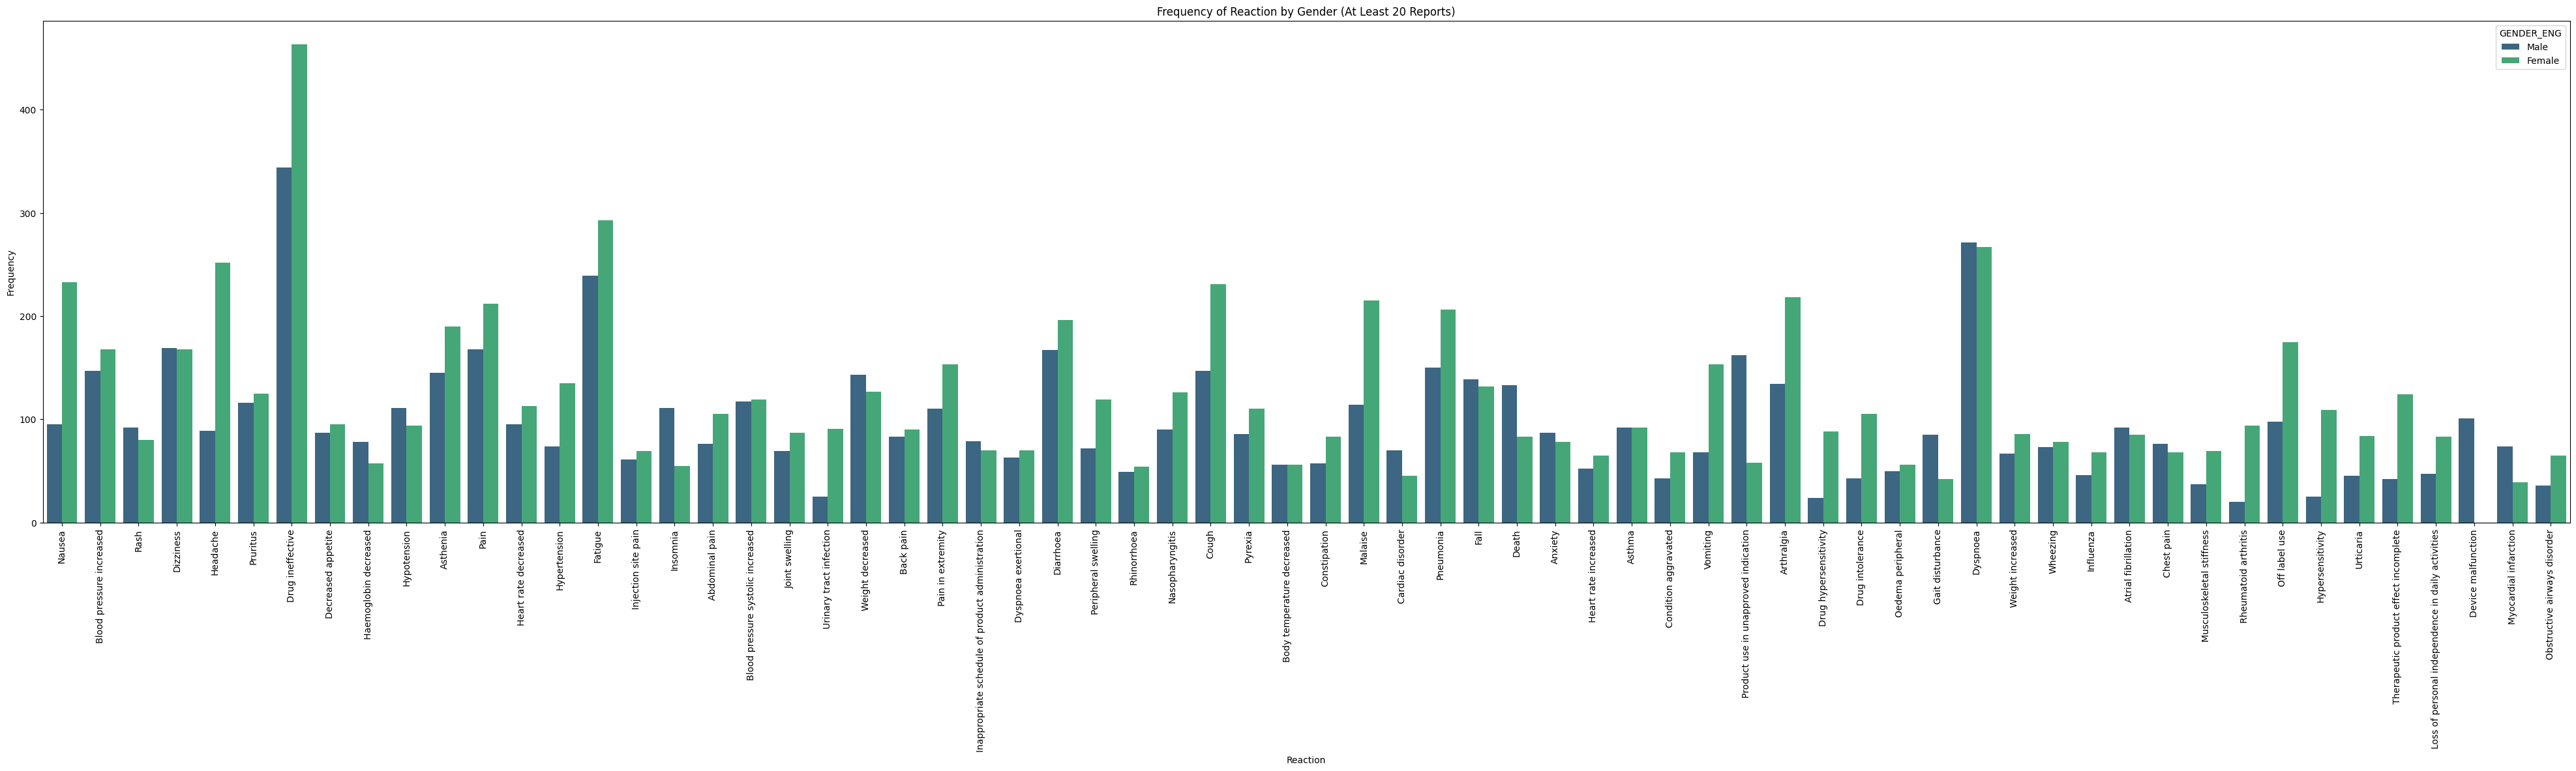

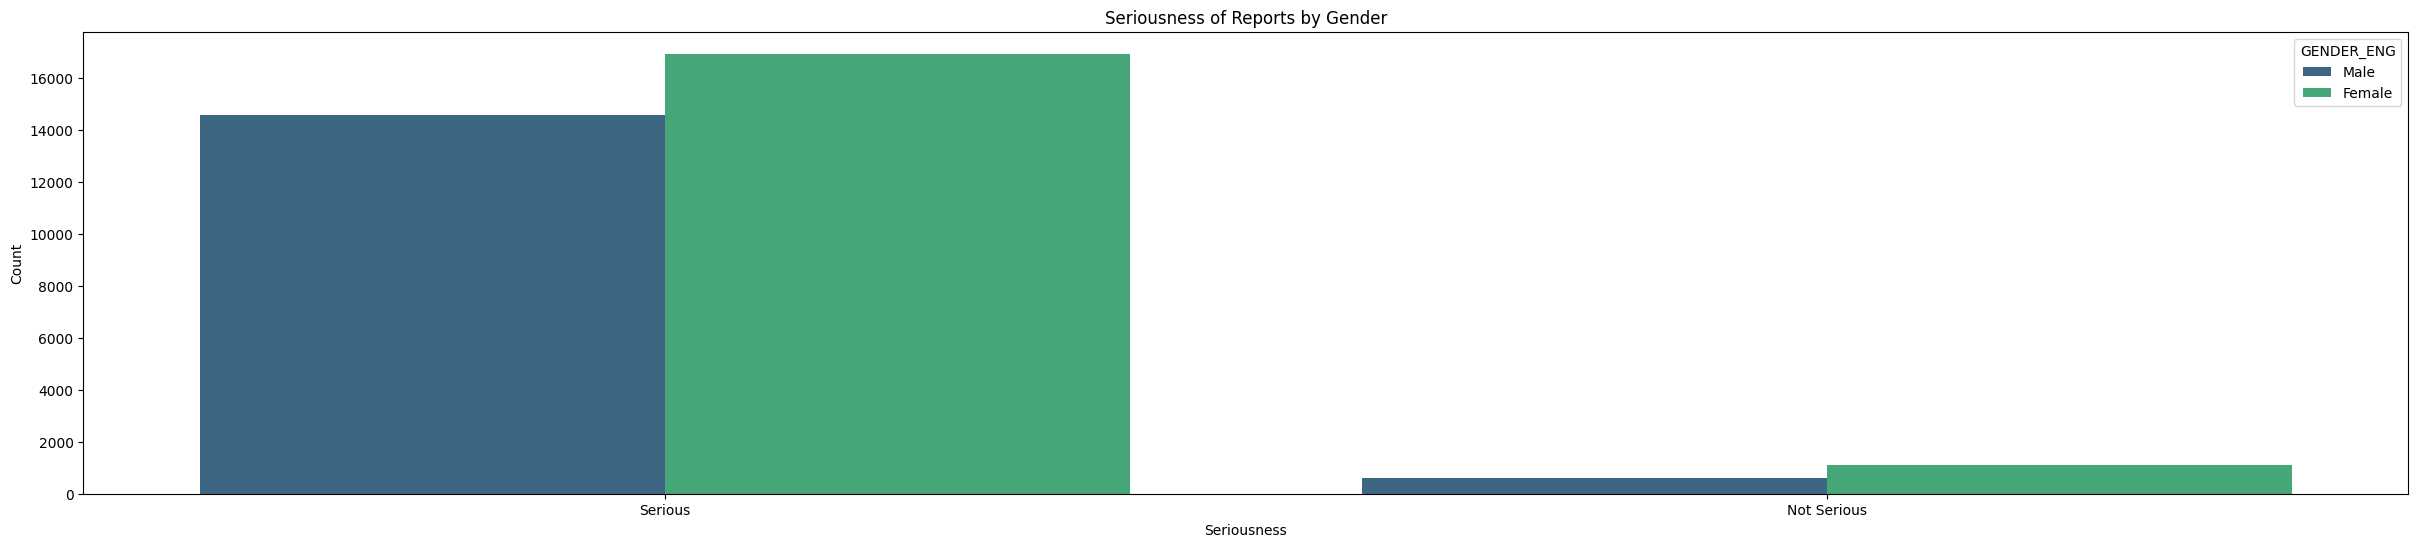

Number of reports for men: 15203
Number of reports for women: 18028


<ipython-input-13-1509082fc742>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisoprolol['AGE_GROUP'] = pd.cut(df_bisoprolol['AGE'], bins=bins, labels=labels)
<ipython-input-13-1509082fc742>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_bisoprolol, x='AGE_GROUP', palette='viridis')


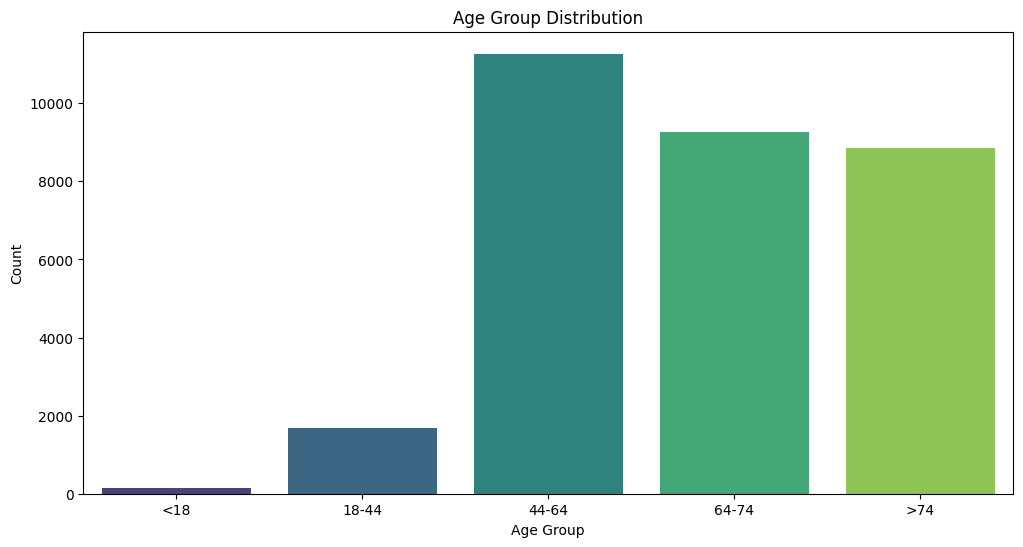

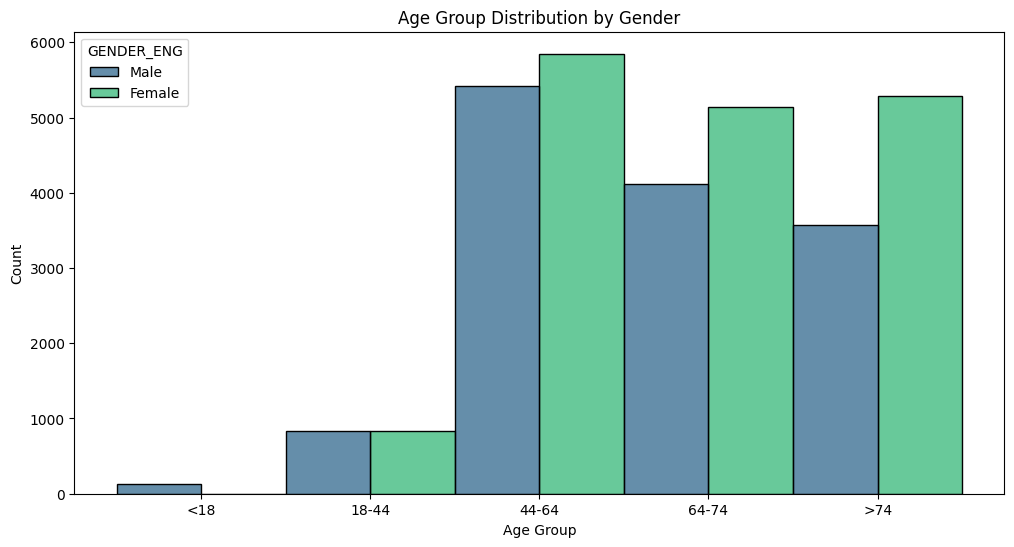

<ipython-input-13-1509082fc742>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisoprolol['Year'] = df_bisoprolol['DATRECEIVED'].apply(parse_and_extract_year) # add year column to DF
<ipython-input-13-1509082fc742>:66: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_bisoprolol, x="Year", multiple='dodge', palette='viridis', stat='count', bins=len(df_bisoprolol['Year'].unique()))


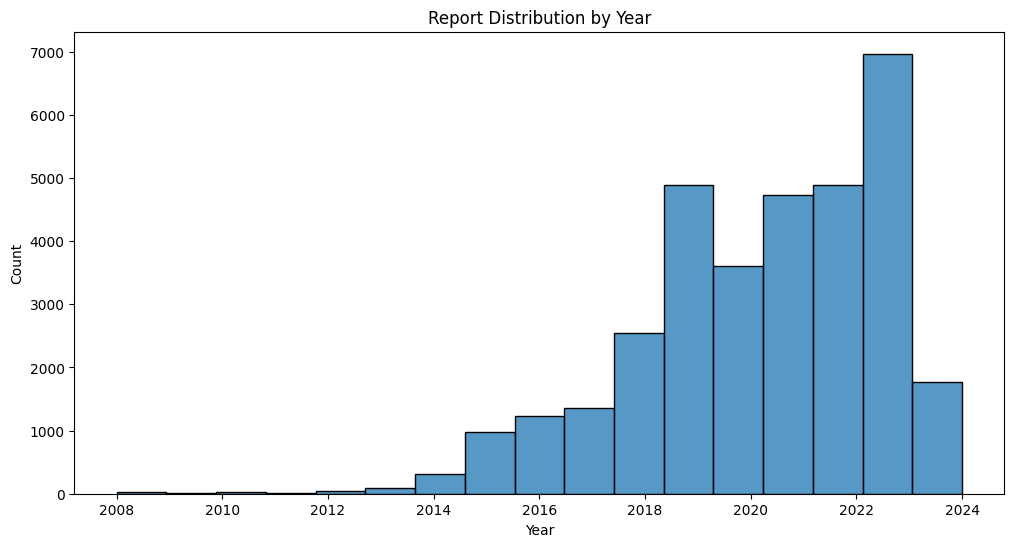

In [ ]:
from datetime import datetime
#choose bisoprolol drug
df_bisoprolol = df_merged[df_merged['DRUGNAME'] == 'BISOPROLOL']
print(df_bisoprolol)

#count frequency of each avderse reaction
reaction_counts = df_bisoprolol['PT_NAME_ENG'].value_counts()

# Filter the DataFrame to keep only those with at least 20 reports
filtered_reactions = reaction_counts[reaction_counts >= 100].index #choose different value based on num reports of your drug
df_filtered = df_bisoprolol[df_bisoprolol['PT_NAME_ENG'].isin(filtered_reactions)] #make df with filtered reactions

# Plot the filtered data -> frequency plot, most adverse reactions men vs women
plt.figure(figsize=(50, 10))
sns.countplot(data=df_filtered, x="PT_NAME_ENG", hue="GENDER_ENG", palette="viridis") #hue compares the count for gender, x-axis is the various reactions we have
plt.title("Frequency of Reaction by Gender (At Least 20 Reports)")
plt.xlabel("Reaction")
plt.ylabel("Frequency")
plt.xticks(rotation=90, fontsize=10)
plt.show()

#plot for seriousness between men and women
plt.figure(figsize=(30, 6))
sns.countplot(data=df_bisoprolol, x='SERIOUSNESS_ENG', hue='GENDER_ENG', palette='viridis')
plt.title('Seriousness of Reports by Gender')
plt.xlabel('Seriousness')
plt.ylabel('Count')
plt.show()
num_reports_men = df_bisoprolol[df_bisoprolol['GENDER_ENG'] == 'Male']['REPORT_ID'].count() #count num reports men vs women
num_reports_women = df_bisoprolol[df_bisoprolol['GENDER_ENG'] == 'Female']['REPORT_ID'].count()
print("Number of reports for men:", num_reports_men)
print("Number of reports for women:", num_reports_women)

# make age bins to split between age groups
bins = [0, 18, 44, 64, 74, float('inf')]
labels = ['<18', '18-44', '44-64', '64-74', '>74']
df_bisoprolol['AGE_GROUP'] = pd.cut(df_bisoprolol['AGE'], bins=bins, labels=labels)

#plot by age group
plt.figure(figsize=(12, 6))
sns.countplot(data=df_bisoprolol, x='AGE_GROUP', palette='viridis')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#plot by age group, men vs women
plt.figure(figsize=(12, 6))
sns.histplot(data=df_bisoprolol, x='AGE_GROUP', hue='GENDER_ENG', multiple='dodge', palette='viridis', stat='count')
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

#string parser for date time -> return year
def parse_and_extract_year(date_str):
    dt = datetime.strptime(date_str, '%d-%b-%y')
    return dt.year

# Convert DATRECEIVED to datetime and extract year
df_bisoprolol['Year'] = df_bisoprolol['DATRECEIVED'].apply(parse_and_extract_year) # add year column to DF
df_bisoprolol = df_bisoprolol[df_bisoprolol['Year'] >= 2000]

# Plot the report distribution by year
plt.figure(figsize=(12, 6))
sns.histplot(data=df_bisoprolol, x="Year", multiple='dodge', palette='viridis', stat='count', bins=len(df_bisoprolol['Year'].unique()))
plt.title('Report Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.cluster import DBSCAN, OPTICS
# import numpy as np

# This box attempts to cluster the data in order to see trends

# df_cleaned = df_merged.copy()
# df_cleaned.drop(columns=['REPORT_ID', "REACTION_ID","REPORT_ID", "DURATION", "DURATION_UNIT_ENG",  "PT_NAME_ENG", "SOC_NAME_ENG", "REPORT_NO",
#                          "REPORT_TYPE_CODE", "REPORT_TYPE_ENG","GENDER_CODE", "GENDER_ENG", "AGE_UNIT_ENG", "OUTCOME_ENG" , "WEIGHT",  "WEIGHT_UNIT_ENG", "HEIGHT", "HEIGHT_UNIT_ENG", "SERIOUSNESS_CODE",
#                          "SERIOUSNESS_ENG", "DEATH", "DISABILITY",  "CONGENITAL_ANOMALY",  "LIFE_THREATENING","HOSP_REQUIRED","OTHER_MEDICALLY_IMP_COND", "REPORT_DRUG_ID", "DRUG_PRODUCT_ID", "DRUGNAME",
#                          "DRUGINVOLV_ENG", "ROUTEADMIN_ENG",  "UNIT_DOSE_QTY", "DOSE_UNIT_ENG", "FREQUENCY",  "BMI", "HEIGHT_M", "WEIGHT_KG", "DATRECEIVED"], inplace=True)
# df_cleaned.dropna(inplace=True)
# print(df_cleaned)
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df_cleaned)

# # Clustering with DBSCAN
# dbscan = DBSCAN(eps=0.5, min_samples=2)
# dbscan_labels = dbscan.fit_predict(scaled_features)

# # Clustering with OPTICS
# optics = OPTICS(min_samples=2)
# optics_labels = optics.fit_predict(scaled_features)

# # Add cluster labels to the DataFrame
# df_merged['DBSCAN_Cluster'] = dbscan_labels
# df_merged['OPTICS_Cluster'] = optics_labels

# plt.figure(figsize=(14, 6))

# # Plot DBSCAN Clusters
# plt.subplot(1, 2, 1)
# sns.scatterplot(x=df_cleaned, y=np.zeros_like(df_cleaned), hue=dbscan_labels, palette='viridis', s=100)
# plt.title('DBSCAN Clusters Based on Age')
# plt.xlabel('Age')
# plt.yticks([])  # Hide y-axis labels

# # Plot OPTICS Clusters
# plt.subplot(1, 2, 2)
# sns.scatterplot(x=df_cleaned['AGE'], y=np.zeros_like(df_cleaned), hue=optics_labels, palette='viridis', s=100)
# plt.title('OPTICS Clusters Based on Age')
# plt.xlabel('Age')
# plt.yticks([])  # Hide y-axis labels

# plt.show()